In [1]:
## import some modules between which also our HamFit_py

import HamF_py as hamf
from iminuit import Minuit
import numpy as np

/tmp/mcolonna/lb-conda/envs/env_test/etc/cling/std.modulemap:257:29: warning: unknown attribute 'optional' [-Wignored-attributes]
  module "memory_resource" [optional] {
                            ^
/tmp/mcolonna/lb-conda/envs/env_test/etc/cling/std.modulemap:447:27: warning: unknown attribute 'optional' [-Wignored-attributes]
  module "bits/chrono.h" [optional] {
                          ^
/tmp/mcolonna/lb-conda/envs/env_test/etc/cling/std.modulemap:531:41: warning: unknown attribute 'optional' [-Wignored-attributes]
  explicit module "bits_ranges_base_h" [optional] {
                                        ^
/tmp/mcolonna/lb-conda/envs/env_test/etc/cling/std.modulemap:538:32: warning: unknown attribute 'optional' [-Wignored-attributes]
  module "bits/ranges_util.h" [optional] {
                               ^
/tmp/mcolonna/lb-conda/envs/env_test/etc/cling/std.modulemap:559:40: warning: unknown attribute 'optional' [-Wignored-attributes]
  module "bits/uses_allocator_args.h" [optio

Welcome to JupyROOT 6.28/04


In [2]:
# here we make use of the Reader class
# that makes use of the classes in the module and gives you a fitter object
# that you can than use to interface any kind of fitting interface

reader = hamf.Reader("B02DstTauNu_TauMu.config")
fitter = reader.createFitter()

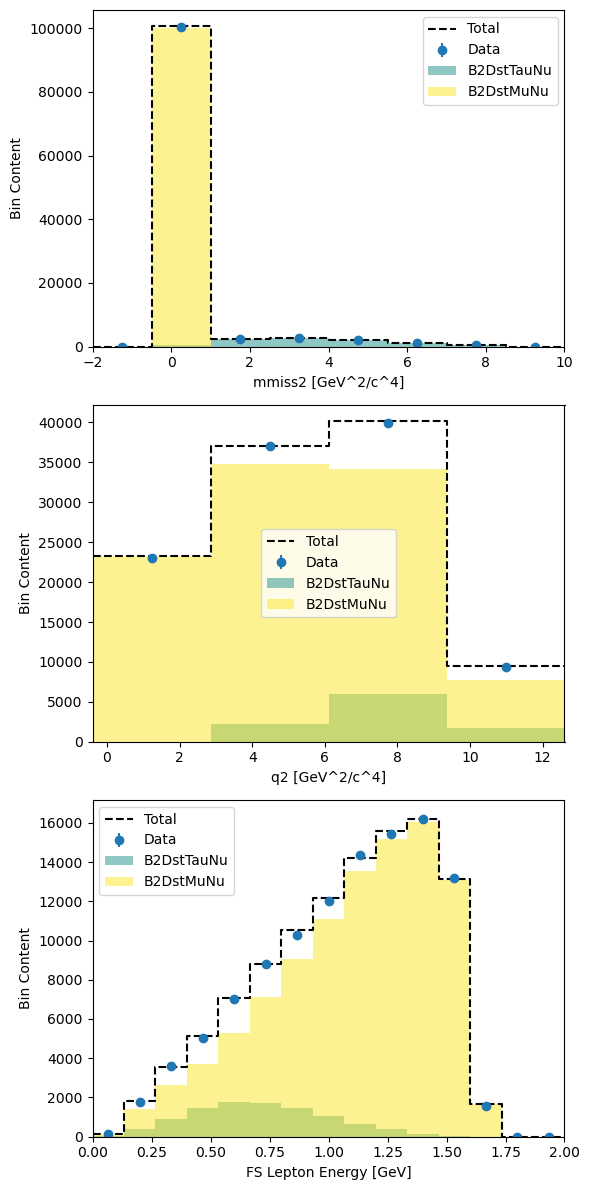

In [3]:
# from the fitter object you can change the parameters and see how it change
# the plot method compares the template with a toy that is produced according to the parameters in the .config file

params = {"SM" : 1., "Re_S_qLlL" : -0., "Im_S_qLlL" : 0. , "Re_S_qRlL" : 0., "Im_S_qRlL" : 0.,  "Re_V_qLlL" : 0., "Im_V_qLlL" : 0. , "Re_V_qRlL" : 0., "Im_V_qRlL" : 0., "Re_T_qLlL" : 0.0, "Im_T_qLlL" : +0., "delta_RhoSq" : 0.0, "delta_cSt" : 0.0, "delta_chi21" : 0., "delta_chi2p" : 0., "delta_chi3p" : 0., "delta_eta1" : 0., "delta_etap" : 0., "delta_phi1p" : 0., "delta_beta21" : 0., "delta_beta3p" : 0.,"lumi" : 1.}
fitter.plot(**params)

In [4]:
# the fitter object is very general:
# you can fit into basically any fitting interface, for example let's do a scan on the
# scalar LL wilson coefficient keeping all the d.o.f except the SM fixed

# we just have to write a couple of simple functions and it is done!

# in the future we also aim to include this already in the HamF module

def fit_scan_FF_fixed(fitter,val1,val2,**initial_guess):
    def nll_wrapped(SM, Re_S_qLlL, Im_S_qLlL, Re_S_qRlL, Im_S_qRlL, Re_V_qLlL, Im_V_qLlL, Re_V_qRlL, Im_V_qRlL, Re_T_qLlL, Im_T_qLlL, delta_RhoSq,delta_cSt,delta_chi21,delta_chi2p,delta_chi3p,delta_eta1,delta_etap,delta_phi1p,delta_beta21,delta_beta3p,lumi):
        return fitter.negative_log_likelihood(SM=SM, Re_S_qLlL=Re_S_qLlL, Im_S_qLlL=Im_S_qLlL, Re_S_qRlL=Re_S_qRlL, Im_S_qRlL=Im_S_qRlL, Re_V_qLlL=Re_V_qLlL, Im_V_qLlL=Im_V_qLlL, Re_V_qRlL=Re_V_qRlL, Im_V_qRlL=Im_V_qRlL, Re_T_qLlL=Re_T_qLlL, Im_T_qLlL=Im_T_qLlL,delta_RhoSq=delta_RhoSq,delta_cSt=delta_cSt,delta_chi21=delta_chi21,delta_chi2p=delta_chi2p,delta_chi3p=delta_chi3p,delta_eta1=delta_eta1,delta_etap=delta_etap,delta_phi1p=delta_phi1p,delta_beta21=delta_beta21,delta_beta3p=delta_beta3p,lumi=lumi)
    m = Minuit(nll_wrapped, **initial_guess)

    m.limits['SM'] = (0.8,1.2)

    m.limits['Re_S_qLlL'] = (val1,val1)
    m.limits['Re_S_qRlL'] = (0.,0.)
    m.limits['Re_V_qLlL'] = (0.,0.)
    m.limits['Re_V_qRlL'] = (0.,0.)
    m.limits['Re_T_qLlL'] = (0.,0.)
    m.limits['Im_S_qLlL'] = (val2,val2)
    m.limits['Im_S_qRlL'] = (0.,0.)
    m.limits['Im_V_qLlL'] = (-0.,0.)
    m.limits['Im_V_qRlL'] = (0.,0.)
    m.limits['Im_T_qLlL'] = (0.,0.)

    m.limits['delta_RhoSq'] = (0.,0.) 
    m.limits['delta_cSt'] = (0.,0.) 
    m.limits['delta_chi21'] = (0.,0.) 
    m.limits['delta_chi2p'] = (0.,0.) 
    m.limits['delta_chi3p'] = (0.,0.) 
    m.limits['delta_eta1'] = (0.,0.) 
    m.limits['delta_etap'] = (0.,0.) 
    m.limits['delta_phi1p'] = (0.,0.) 
    m.limits['delta_beta21'] = (0.,0.) 
    m.limits['delta_beta3p'] = (0.,0.) 

    m.limits['lumi'] = (1.,1.)
    m.migrad()
    return m.fval

# if you want to save time decrease the value of Granularity (Granularity 30 takes ~30 minutes)
# or if you want to have a better resolution increase it but the scan might take some time
def scan(fitter):
    Granularity = 30
    Re_Grid = np.linspace(-1.,1.,Granularity)
    Im_Grid = np.linspace(-1.,1.,Granularity)
    Chi_Grid = np.zeros((Granularity, Granularity))
    for i in range(Granularity):
        for j in range(Granularity):
            initial_guess = {
                'SM': 1.0,
                'Re_S_qLlL': Re_Grid[i],
                'Im_S_qLlL': Im_Grid[i],
                'Re_S_qRlL': 0.0,
                'Im_S_qRlL': 0.0,
                'Re_V_qLlL': 0.0,
                'Im_V_qLlL': 0.0,
                'Re_V_qRlL': 0.0,
                'Im_V_qRlL': 0.0,
                'Re_T_qLlL': 0.0,
                'Im_T_qLlL': 0.0,
                "delta_RhoSq" : 0.,
                "delta_cSt" : 0.0,
                "delta_chi21" : 0.,
                "delta_chi2p" : 0.,
                "delta_chi3p" : 0.,
                "delta_eta1" : 0.,
                "delta_etap" : 0.,
                "delta_phi1p" : 0.,
                "delta_beta21" : 0.,
                "delta_beta3p" : 0.,
                'lumi': 1.
            }
            Chi_Grid[i][j]=fit_scan_FF_fixed(fitter,Re_Grid[i],Im_Grid[j],**initial_guess)
    return Chi_Grid

In [5]:
%time Grid_mu = scan(fitter)

CPU times: user 32min 3s, sys: 3.9 s, total: 32min 7s
Wall time: 32min 18s


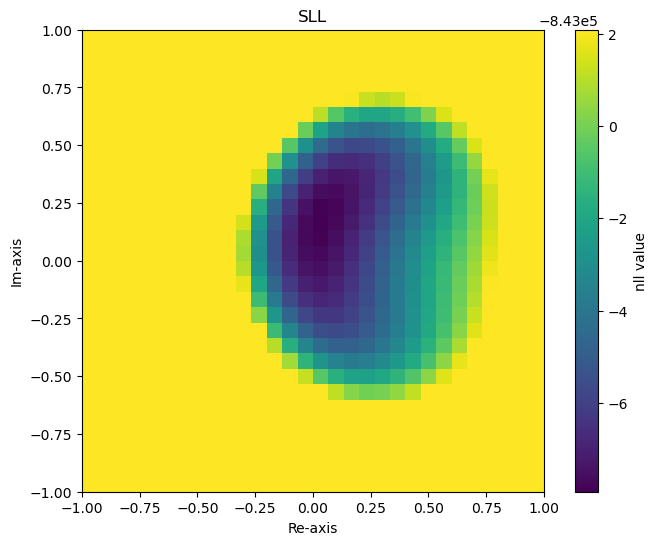

In [10]:
# lets have a look to the result of our scan

import matplotlib.pyplot as plt

Grid_mu_mod = np.copy(Grid_mu)
min_chi_mu = Grid_mu_mod.min()
Grid_mu_mod[Grid_mu_mod > min_chi_mu + 10] = min_chi_mu + 10

plt.figure(figsize=(8, 6))
plt.imshow(Grid_mu_mod.transpose(), cmap='viridis', interpolation='nearest', extent=[-1, 1, -1, 1])
plt.colorbar(label=r'nll value')
plt.title('SLL')
plt.xlabel('Re-axis')
plt.ylabel('Im-axis')
plt.grid(False)

plt.show()


In [7]:
# more simple, as more complex, cases are also possible